### Processamento dos WaveStaffs

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
import scipy.io as sio
import pandas as pd
import glob

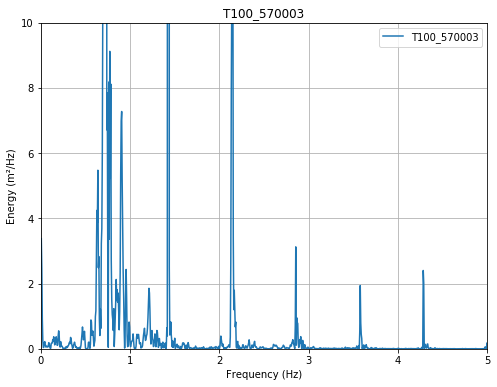

In [42]:
# pathname dos dados
pathname = os.environ['HOME'] + '/Dropbox/ondometro/data/laboceano/wavestaffs/'

paths = np.sort(glob.glob(pathname + 'T100_570003*'))

# comprimento do vetor do espectro
cs = 1500

# create dict with spectra parameters
dspec = {}

for filename in paths:
    
    name = filename.split('/')[-1].split('.')[0]

    # load data in dictionary
    d = sio.loadmat(filename)

    # convert to dataframe
    df = {}
    for w in ['tempo','WP_01','WP_17']:
        df[w] = d[w][:,0]

    df = pd.DataFrame(df, index=df['tempo'])
    df = df.set_index('tempo')

    nfft = df.shape[0]/1.
    fs = 1/(df.index[3] - df.index[2])

    spec = mlab.psd(df.WP_01,NFFT=int(nfft),Fs=fs,detrend=mlab.detrend_mean,
                  window=mlab.window_hanning,noverlap=nfft/2)
    f, sp = spec[1][1:cs], spec[0][1:cs]

    plt.figure(figsize=(8,6))
    plt.plot(f, sp,'-', label=name)
    plt.title(name)
#     plt.xlim(10**-0.7, 10**1.5)
    plt.xlim(0, 5)
    plt.ylim(0, 10)
    
    plt.grid()
    
    dspec[name] = np.array([f, sp])

plt.xlabel('Frequency (Hz)')
plt.ylabel('Energy (m²/Hz)')
plt.legend()